In [1]:
import numpy as np
import pandas as pd


In [2]:
df0 = pd.read_csv('./subjectivity_train.csv') # rt-polarity_train
print('Totlal records:', df0.shape[0])

selected_columns = ['text', 'sentiment']

df = df0[selected_columns]
df.info()

Totlal records: 8016
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8016 entries, 0 to 8015
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       8012 non-null   object
 1   sentiment  8016 non-null   object
dtypes: object(2)
memory usage: 125.4+ KB


In [3]:
print('\nWithout nulls')
df = df.dropna()
print(df.describe().T)

df.head()


Without nulls
          count unique                                                top  \
text       8012   8012  the movie begins in the past where a young boy...   
sentiment  8012      2                                         Subjective   

           freq  
text          1  
sentiment  4012  


,text,sentiment
0,the movie begins in the past where a young boy...,Objective
1,"smart and alert , thirteen conversations about...",Subjective
2,emerging from the human psyche and showing cha...,Objective
3,"color , musical bounce and warm seas lapping o...",Subjective
4,spurning her mother's insistence that she get ...,Objective


<Axes: xlabel='sentiment', ylabel='count'>

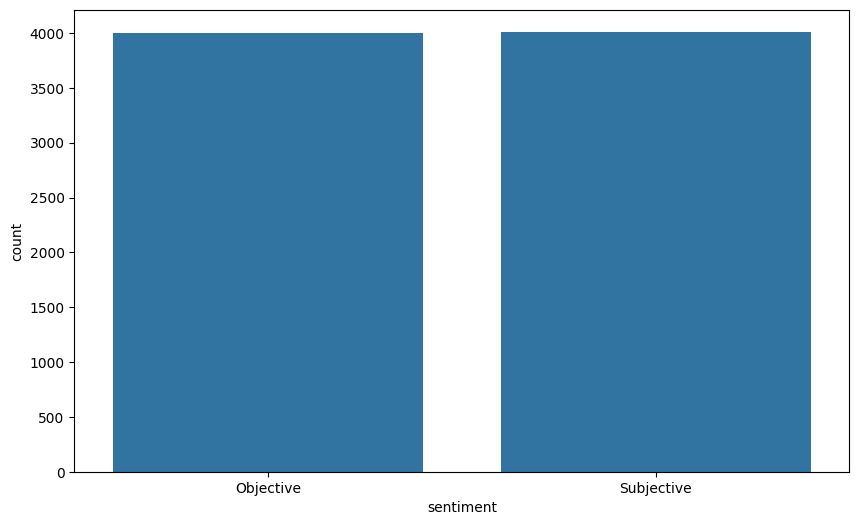

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(10, 6))
sns.countplot(x='sentiment', data=df.sort_values(by=['sentiment'], ascending=True), ax=ax1)


In [5]:
df['sentiment'].value_counts()

,count
sentiment,
Subjective,4012
Objective,4000


In [6]:
target = 'sentiment'
df.loc[df[target] == 'Objective', target] = 0
df.loc[df[target] == 'Subjective', target] = 1
df = df[df[target].isin([0, 1])] # dropping the rest
df[target].value_counts()

,count
sentiment,
1,4012
0,4000


In [7]:
import re

REGX_RT = r"RT @[A-Za-z0-9$-_@.&+]+:"
REGX_USERNAME = r"@[A-Za-z0-9$-_@.&+]+"
REGX_URL = r"https?://[A-Za-z0-9./]+"
REGX_ASCII = r"[^\x00-\x7F]"

def decontract(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"it\'s", "it is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"1st", "first", phrase)
    phrase = re.sub(r"2nd", "second", phrase)
    phrase = re.sub(r"3rd", "third", phrase)

    return phrase

def preprocess_text(text):
    text = re.sub(REGX_RT, ' ', text)

    text = text.lower()

    # extra html line breaks
    text = re.sub('<unk>', ' ', text)
    text = re.sub('\n', ' ', text)

    text = decontract(text)

    text = re.sub(REGX_USERNAME, ' ', text)
    text = re.sub(REGX_URL, ' ', text)
    text = re.sub(REGX_ASCII, ' ', text)

    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[,.:~%<>\[\]\(\)\"|\s\-\s|\-\-]', ' ', text)  # Remove punctuation
    text = re.sub(r'\$\s', ' ', text)  # non ticker $
    text = re.sub(r'\s\$$', ' ', text)  # trailing $
    text = re.sub(' +', ' ', text)
    text = re.sub('^\s+', '', text)
    text = re.sub('\s+$', '', text)
    return text

# Apply preprocessing
df['text'] = df['text'].apply(preprocess_text)
df['text'].head(10)

,text
0,the movie begins in the past where a young boy...
1,smart and alert thirteen conversations about o...
2,emerging from the human psyche and showing cha...
3,color musical bounce and warm seas lapping on ...
4,spurning her mother's insistence that she get ...
5,it is not a mass market entertainment but an u...
6,amitabh can not believe the board of directors...
7,a light hearted french film about the spiritua...
8,she among others excentricities talks to a sma...
9,my wife is an actress has its moments in looki...


In [8]:
# Let's see text length variation
df['text_len'] = df['text'].str.len()
df['text_len'].describe()

,text_len
count,8012.000000
mean,122.132551
std,51.381811
min,18.000000
25%,84.000000
50%,114.000000
75%,152.000000
max,459.000000


In [9]:
df = df[df['text'].str.len()>=10] # dropping extra short (nothing dropped)
df.shape[0]

8012

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8012 entries, 0 to 8015
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       8012 non-null   object
 1   sentiment  8012 non-null   object
 2   text_len   8012 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 250.4+ KB


In [11]:
df[target] = df[target].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8012 entries, 0 to 8015
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       8012 non-null   object
 1   sentiment  8012 non-null   int64 
 2   text_len   8012 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 250.4+ KB


In [12]:
from wordcloud import WordCloud,STOPWORDS
def df_wordcloud(df):
  words = ' '.join(df['text'])
  wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=4000,
                      height=2500
                     ).generate(words)
  plt.figure(1,figsize=(12, 15))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

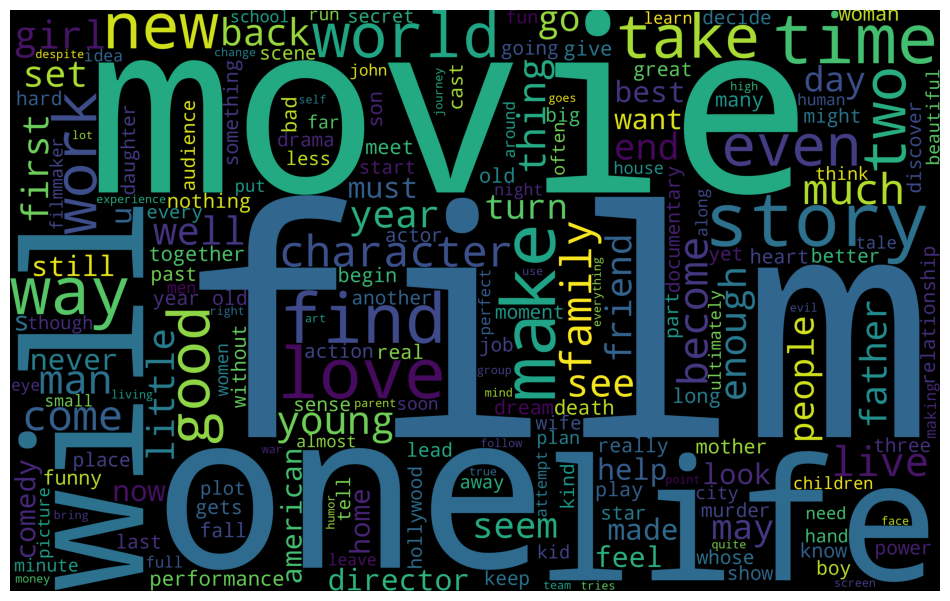

In [13]:
df_wordcloud(df) # all

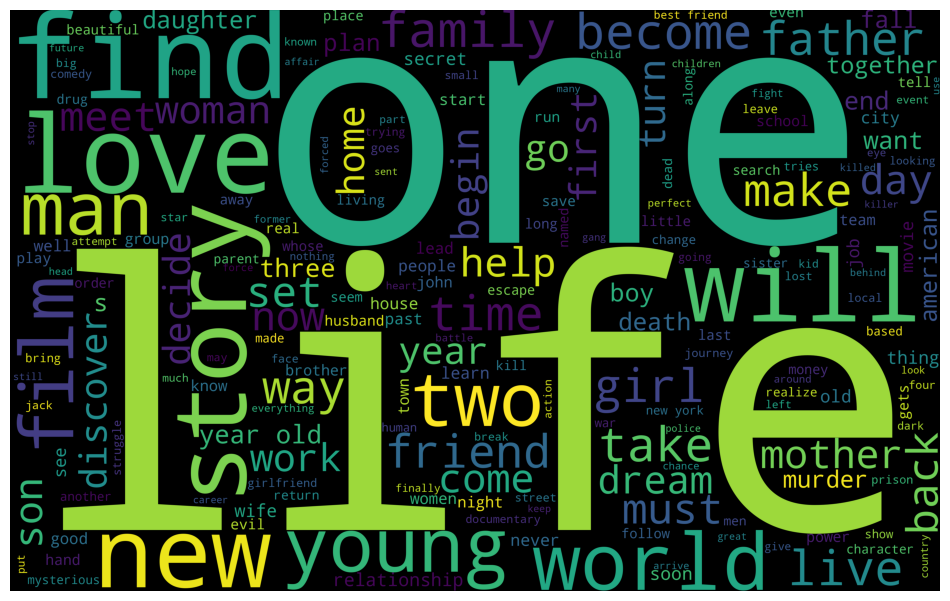

In [14]:
df_wordcloud(df[df[target]==0]) # Objective

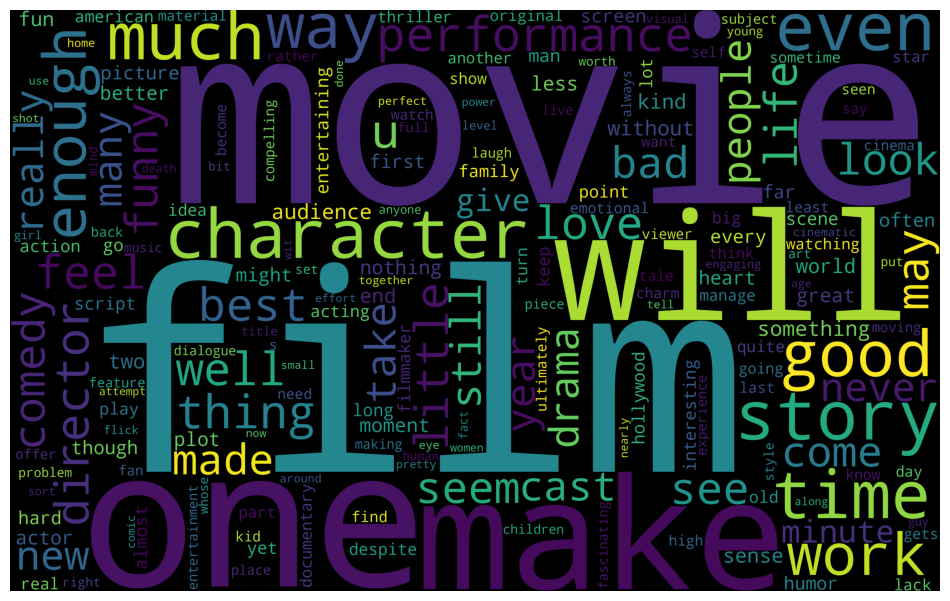

In [15]:
df_wordcloud(df[df[target]==1]) # Subjective

In [16]:
# let's look at TOP50 frequent words
# we don't remove stop words to keep sentiment information
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:50]
freq

,count
the,9343
a,6296
and,5451
of,5110
to,4427
is,3431
in,2855
it,1858
that,1689
his,1596


In [17]:
df.to_csv("cleaned.csv")

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
labelencoder = LabelEncoder()
onehotencoder = OneHotEncoder()
ordinalencoder = OrdinalEncoder()

y = df[target].values
y_label = labelencoder.fit_transform(y)
print(y_label[-10:])
y_ohe = onehotencoder.fit_transform(y_label.reshape(-1, 1)).toarray()
print(y_ohe[-10:])

[1 1 1 1 1 1 1 1 1 1]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [19]:
val_size = 0.15
test_size = 0.15

In [20]:
df_train  = df[0:int(df.shape[0]*(1-val_size-test_size))]
print(df_train.shape)
df_train.head()

(5608, 3)


,text,sentiment,text_len
0,the movie begins in the past where a young boy...,0,94
1,smart and alert thirteen conversations about o...,1,69
2,emerging from the human psyche and showing cha...,0,272
3,color musical bounce and warm seas lapping on ...,1,109
4,spurning her mother's insistence that she get ...,0,166


In [21]:
y_train  = y_ohe[0:int(df.shape[0]*(1-val_size-test_size))]
print(y_train.shape)

y_train

(5608, 2)


array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [22]:
df_val  = df[df_train.shape[0]:int(df.shape[0]*(1-test_size))]
print(df_val.shape)
df_val.reset_index(inplace = True, drop = True)

y_val  = y_ohe[df_train.shape[0]:int(df.shape[0]*(1-test_size))]
print(y_val.shape)


(1202, 3)
(1202, 2)


In [23]:
df_test  = df[int(df.shape[0]*(1-test_size)):]
print(df_test.shape)
df_test.reset_index(inplace = True, drop = True)

y_test  = y_ohe[int(df.shape[0]*(1-test_size)):]
print(y_test.shape)


(1202, 3)
(1202, 2)


In [24]:
print(len(y_train))
print((df_train.shape))
print(len(y_val))
print((df_val.shape))
print(len(y_test))
print((df_test.shape))

5608
(5608, 3)
1202
(1202, 3)
1202
(1202, 3)


In [25]:
X_train_final_text = df_train['text'].values
X_val_final_text = df_val['text'].values
X_test_final_text = df_test['text'].values

print("Train Val Test")
print(X_train_final_text.shape, y_train.shape)
print(X_val_final_text.shape, y_val.shape)
print(X_test_final_text.shape, y_test.shape)


Train Val Test
(5608,) (5608, 2)
(1202,) (1202, 2)
(1202,) (1202, 2)


In [26]:
#total unique word count in whole corpus
total_unique_words = len(set((' ').join(df['text'].values).split()))
total_unique_words

19707

In [27]:
#total unique word cound in train corpus
len(set((' ').join(df_train['text'].values).split()))

16470

In [28]:
df['totalwords_after_cleaning'] = df['text'].str.split().str.len()
df['totalwords_after_cleaning'].describe()

,totalwords_after_cleaning
count,8012.000000
mean,21.688592
std,9.036867
min,3.000000
25%,15.000000
50%,20.000000
75%,27.000000
max,79.000000


<Axes: >

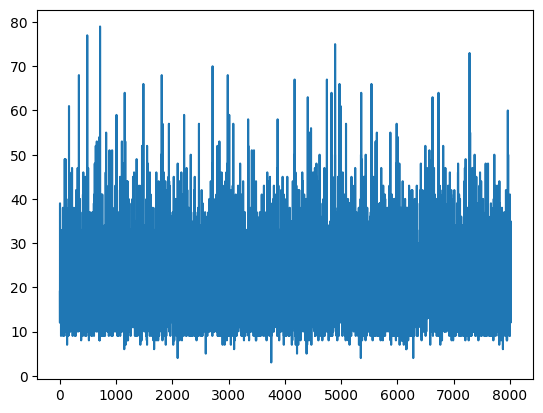

In [29]:
df['totalwords_after_cleaning'].plot()

In [30]:
# Get max training and test sequence length
MAX_LEN = 80

In [31]:
from numpy import array
from numpy import asarray
from numpy import zeros
import tensorflow as tf
# from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

# from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

num_words = total_unique_words
oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'

# Tokenize our training data
tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token, filters='!"#$%&()*+,-/:;<=>?@[\\]^`{|}~\t\n') #not filtering "_"
tokenizer.fit_on_texts(X_train_final_text)

# Get our training  data word index
word_index = tokenizer.word_index

# Encode training and test data sentences into sequences
train_sequences = tokenizer.texts_to_sequences(X_train_final_text)
val_sequences = tokenizer.texts_to_sequences(X_val_final_text)
test_sequences = tokenizer.texts_to_sequences(X_test_final_text)


# Pad the training  and test sequences
train_padded = pad_sequences(train_sequences, padding=pad_type, truncating=trunc_type, maxlen=MAX_LEN)
val_padded = pad_sequences(val_sequences, padding=pad_type, truncating=trunc_type, maxlen=MAX_LEN)
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen=MAX_LEN)

# Output the results of our work
#print("Word index:\n", word_index)
#print("\nTraining sequences:\n", train_sequences)
#print("\nPadded training sequences:\n", train_padded)
print("\nPadded training shape:", train_padded.shape)
print("Training sequences data type:", type(train_sequences))
print("Padded Training sequences data type:", type(train_padded))
print("\nPadded validation shape:", val_padded.shape)
print("validation sequences data type:", type(val_sequences))
print("Padded validation sequences data type:", type(val_padded))
print("\nPadded test shape:", test_padded.shape)
print("test sequences data type:", type(test_sequences))
print("Padded test sequences data type:", type(test_padded))


Padded training shape: (5608, 80)
Training sequences data type: <class 'list'>
Padded Training sequences data type: <class 'numpy.ndarray'>

Padded validation shape: (1202, 80)
validation sequences data type: <class 'list'>
Padded validation sequences data type: <class 'numpy.ndarray'>

Padded test shape: (1202, 80)
test sequences data type: <class 'list'>
Padded test sequences data type: <class 'numpy.ndarray'>


In [32]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

16407

In [33]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
import tensorflow as tf

val_features_list = [val_padded]

class Metrics(tf.keras.callbacks.Callback):

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(val_features_list))).round()
        val_targ = y_val
        _val_f1 = f1_score(val_targ, val_predict, average='micro')
        _val_recall = recall_score(val_targ, val_predict, average='micro')
        _val_precision = precision_score(val_targ, val_predict, average='micro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        print (" — val_f1: %f — val_precision: %f — val_recall %f" %(_val_f1, _val_precision, _val_recall))

        return


metrics = Metrics()

In [34]:
from tensorflow.keras.layers import Activation, Conv2D, Input, Embedding, Bidirectional, Reshape, MaxPool2D, Concatenate, Flatten, Dropout, Dense, Conv1D, MaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler, EarlyStopping, TerminateOnNaN, TensorBoard
from tensorflow.keras.optimizers import Adam
import datetime, os
from tensorflow.keras.layers import LSTM


drop = 0.4


##########################
### text input
input1 = Input(shape=(MAX_LEN,), name = 'text')
#print(input1.shape)
embedding_layer1 = Embedding(vocab_size, 128) #, weights=[embedding_matrix], input_length=120, trainable=False)
embedding1 = embedding_layer1(input1)
# lstm1 = LSTM(100, dropout=drop, recurrent_dropout=drop)(embedding1)
lstm1 = Bidirectional(LSTM(64, return_sequences=True, dropout=drop, recurrent_dropout=0.7))(embedding1)
lstm2 = Bidirectional(LSTM(64, dropout=drop, recurrent_dropout=drop))(lstm1)

# dense1 = Dense(24, activation='relu')(lstm2)

output = Dense(units=2, activation='softmax')(lstm2) # (lstm2) #dense1 (dropout1)

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=1, verbose=1,
    mode="max") #"auto")
filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.keras"
logdir = os.path.join("logss", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=logdir,histogram_freq=1, write_graph=True) #,write_grads=True)
metrics = Metrics()

checkpoint = ModelCheckpoint('weights_lstm.keras', monitor='val_accuracy',
                             verbose=1, save_best_only=True, mode='auto')

callback_list = [earlystop,checkpoint, tensorboard_callback, metrics]


model = Model(inputs=[input1], outputs=output)

adam = Adam(
    learning_rate=0.001,
    # beta_1=0.9,
    # beta_2=0.999,
    # epsilon=1e-07,
)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text (InputLayer)                    │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 80, 128)             │       2,100,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 80, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,297,986 (8.77 MB)

 Trainable params: 2,297,986 (8.77 MB)

 Non-trainable params: 0 (0.00 B)

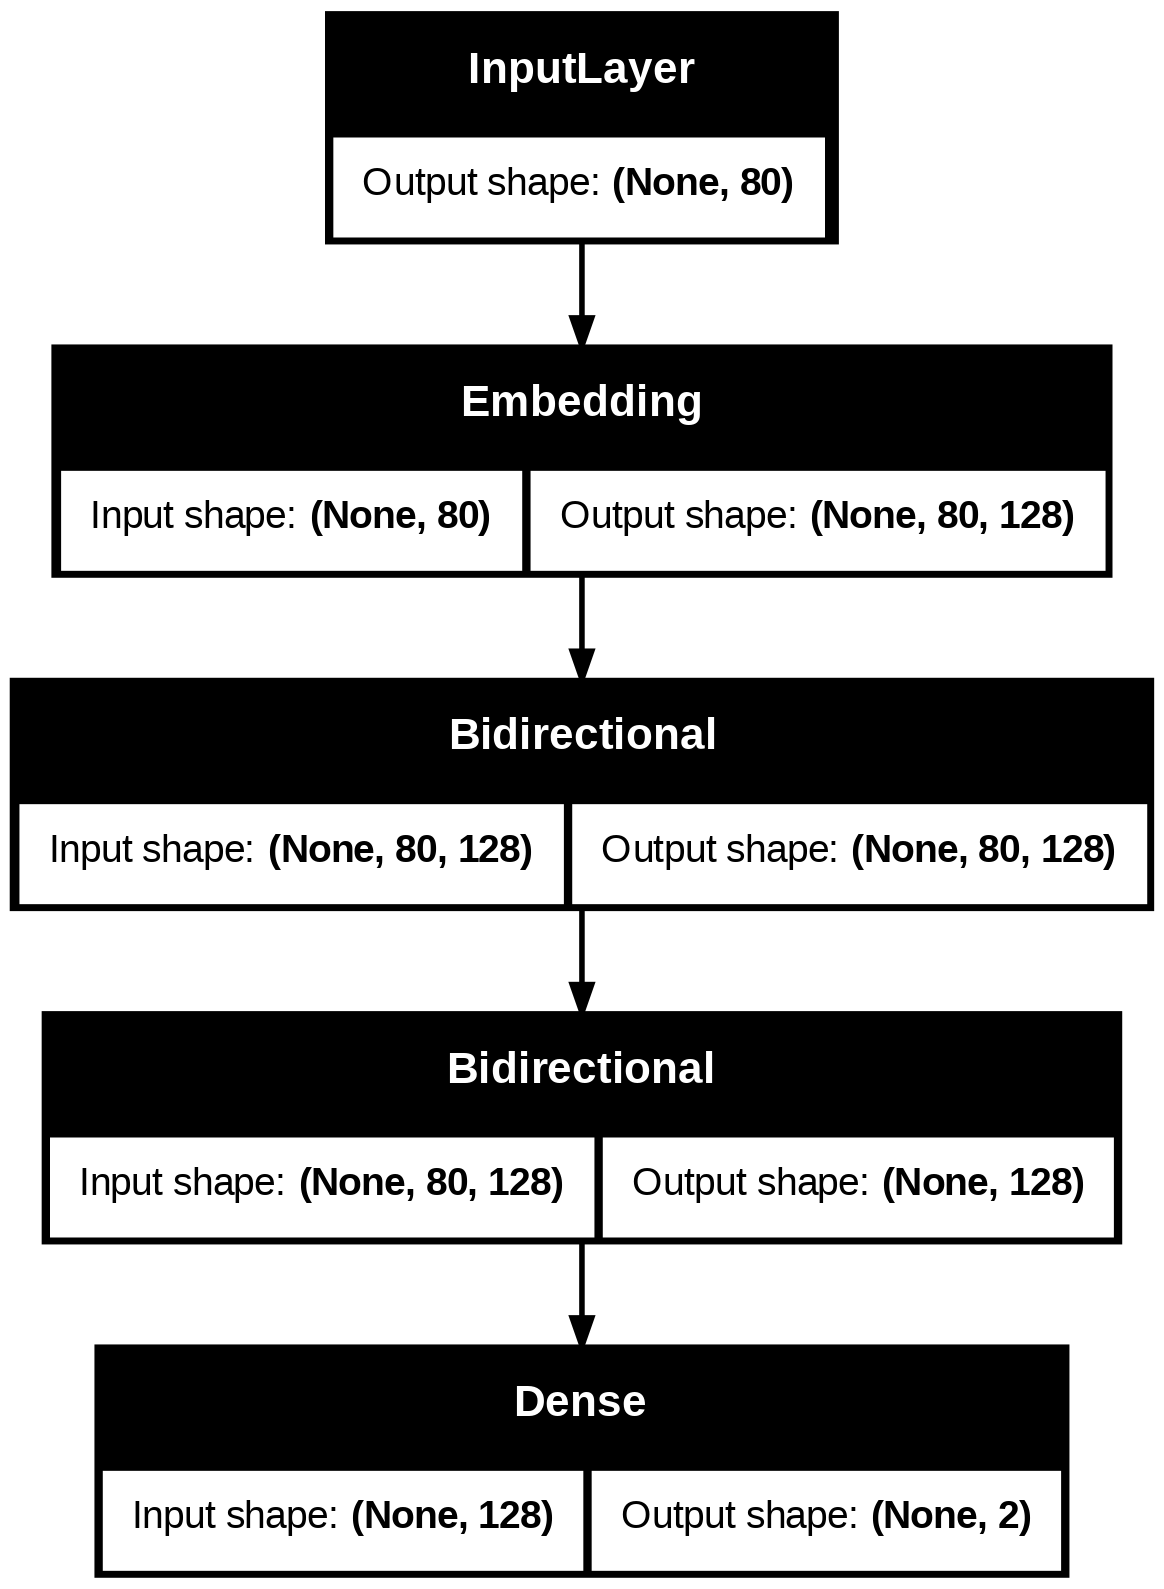

In [35]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [36]:
!rm -rf logss/

In [37]:
print(list(y_train[:5]))
print(list(y_val[:5]))
np.argmax(y_train[:5], axis=1)

[array([1., 0.]), array([0., 1.]), array([1., 0.]), array([0., 1.]), array([1., 0.])]
[array([1., 0.]), array([0., 1.]), array([1., 0.]), array([0., 1.]), array([1., 0.])]


array([0, 1, 0, 1, 0])

In [38]:
df_train[target].value_counts()

,count
sentiment,
0,2805
1,2803


In [39]:
df_val[target].value_counts()

,count
sentiment,
0,602
1,600


In [40]:
train_features = {"text" : train_padded}
val_features = {"text" : val_padded}

model_history = model.fit(train_features, y_train,
                          batch_size=32, epochs=50,
                          validation_data = (val_features, y_val),
                          callbacks=[callback_list])


Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.6034 - loss: 0.6203
Epoch 1: val_accuracy improved from -inf to 0.88852, saving model to weights_lstm.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step
 — val_f1: 0.888519 — val_precision: 0.888519 — val_recall 0.888519
176/176 ━━━━━━━━━━━━━━━━━━━━ 104s 499ms/step - accuracy: 0.6041 - loss: 0.6196 - val_accuracy: 0.8885 - val_loss: 0.2482
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.9349 - loss: 0.1835
Epoch 2: val_accuracy improved from 0.88852 to 0.89601, saving model to weights_lstm.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step
 — val_f1: 0.896007 — val_precision: 0.896007 — val_recall 0.896007
176/176 ━━━━━━━━━━━━━━━━━━━━ 141s 494ms/step - accuracy: 0.9350 - loss: 0.1834 - val_accuracy: 0.8960 - val_loss: 0.2537
Epoch 2: early stopping


In [64]:
# Load the TensorBoard notebook extension
# %load_ext tensorboard
# %reload_ext tensorboard

In [42]:
# !kill 8376

In [ ]:
# %tensorboard --logdir logss/

In [44]:
test_features = {"text" : test_padded}
test_scores = model.evaluate(test_features, y_test, verbose=2)

38/38 - 2s - 65ms/step - accuracy: 0.8910 - loss: 0.2906


In [45]:
test_features_list = [test_padded]

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score

test_predict = (np.asarray(model.predict(test_features_list))).round()
test_targ = y_test
_test_f1 = f1_score(test_targ, test_predict, average='macro') # , average='micro'
_test_recall = recall_score(test_targ, test_predict, average='macro') # , average='micro'
_test_precision = precision_score(test_targ, test_predict, average='macro') # , average='micro'

print(f"test\n — test_f1: {_test_f1}\n — test_precision: {_test_precision}\n — test_recall {_test_recall}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step
test
 — test_f1: 0.8909816991988856
 — test_precision: 0.8922494172494173
 — test_recall 0.8914054776995988


In [46]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix, ConfusionMatrixDisplay
# Creating  a confusion matrix,which compares the y_test and y_pred
cr = classification_report(y_test, test_predict, digits=3, zero_division=0)
print(cr)
multilabel_confusion_matrix(y_test, test_predict)

              precision    recall  f1-score   support

           0      0.867     0.921     0.893       593
           1      0.918     0.862     0.889       609

   micro avg      0.891     0.891     0.891      1202
   macro avg      0.892     0.891     0.891      1202
weighted avg      0.893     0.891     0.891      1202
 samples avg      0.891     0.891     0.891      1202



array([[[525,  84],
        [ 47, 546]],

       [[546,  47],
        [ 84, 525]]])

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc_score(y_test, test_predict, multi_class='ovr')

0.8914054776995988

In [48]:
import matplotlib.pyplot as plt
def plot_history(history):
  plt.figure(figsize=(12, 5))

  # (accuracy)
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Train Accuracy')
  plt.plot(history.history['val_accuracy'], label='Val Accuracy')
  plt.title('(Accuracy) Curves')
  plt.xlabel('Epoch')
  plt.ylabel('(Accuracy)')
  plt.legend()

  # (loss)
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Val Loss')
  plt.title('(Loss) Curves')
  plt.xlabel('Epoch')
  plt.ylabel('(Loss)')
  plt.legend()

  plt.tight_layout()
  plt.show()

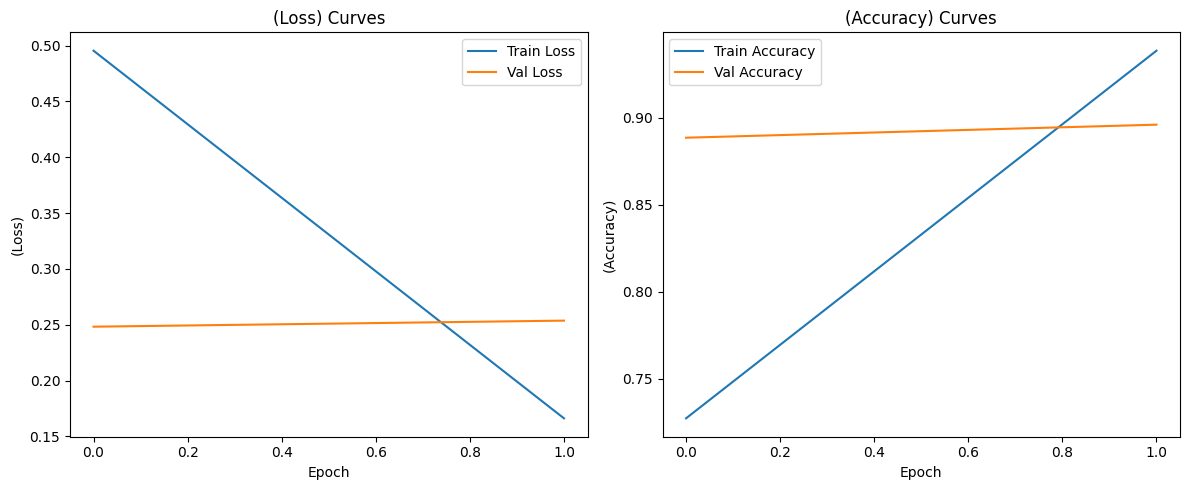

In [49]:
plot_history(model_history)

## Let's check performance of simpler ML models

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Define the feature (X) and target (y) columns
X = df['text']
y = df['sentiment']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=vocab_size)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [51]:
# Train LogisticRegression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_vectorized, y_train)

# Make predictions and evaluate the model
y_pred = lr_model.predict(X_test_vectorized)
print("LogisticRegression Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

LogisticRegression Model Performance
Accuracy: 0.8995633187772926
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       786
           1       0.90      0.90      0.90       817

    accuracy                           0.90      1603
   macro avg       0.90      0.90      0.90      1603
weighted avg       0.90      0.90      0.90      1603



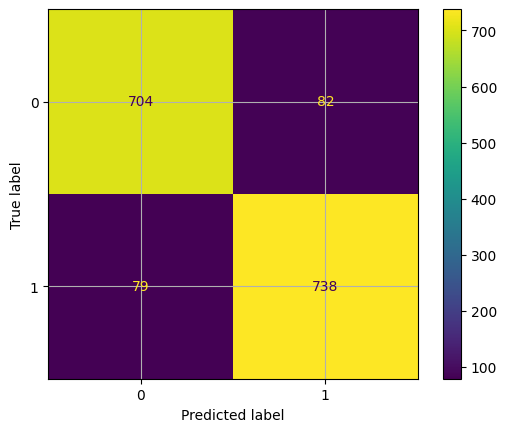

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(None);

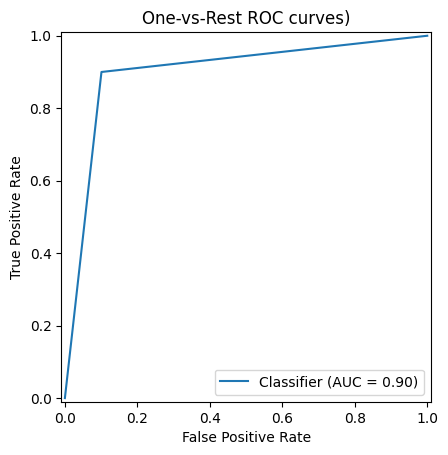

In [53]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(y_pred, y_test,)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves)",
)

In [54]:
def text_predict(text, model, vectorizer):
  test_text_vectorized = vectorizer.transform([text])
  test_text_pred = model.predict(test_text_vectorized)
  print(text, '->', test_text_pred)


In [55]:
# 0 - onjective, 1 - subjective

text_predict("I love this funny movie!", lr_model, vectorizer)
text_predict("I hate that boring movie!", lr_model, vectorizer)

# objective, from subjectivity_test.csv
text_predict("dre is an executive with a hip-hop record company based in new york", lr_model, vectorizer)
text_predict("to define family guy must seek beyond what he can see touch taste smell or hear", lr_model, vectorizer)

# subjective, from subjectivity_test.csv
text_predict("resident evil may be brain dead but it's great popcorn entertainment nonetheless", lr_model, vectorizer)

I love this funny movie! -> [1]
I hate that boring movie! -> [1]
dre is an executive with a hip-hop record company based in new york -> [0]
to define family guy must seek beyond what he can see touch taste smell or hear -> [0]
resident evil may be brain dead but it's great popcorn entertainment nonetheless -> [1]


In [56]:
# Train Naive Bayes model
nb_model = MultinomialNB()
history = nb_model.fit(X_train_vectorized, y_train)

# Make predictions and evaluate the model
y_pred = nb_model.predict(X_test_vectorized)
print("Naive Bayes Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Naive Bayes Model Performance
Accuracy: 0.925764192139738
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       786
           1       0.92      0.94      0.93       817

    accuracy                           0.93      1603
   macro avg       0.93      0.93      0.93      1603
weighted avg       0.93      0.93      0.93      1603



In [57]:
# 0 - onjective, 1 - subjective

text_predict("I love this funny movie!", lr_model, vectorizer)
text_predict("I hate that boring movie!", lr_model, vectorizer)

# objective, from subjectivity_test.csv
text_predict("dre is an executive with a hip-hop record company based in new york", lr_model, vectorizer)
text_predict("to define family guy must seek beyond what he can see touch taste smell or hear", lr_model, vectorizer)

# subjective, from subjectivity_test.csv
text_predict("resident evil may be brain dead but it's great popcorn entertainment nonetheless", lr_model, vectorizer)

I love this funny movie! -> [1]
I hate that boring movie! -> [1]
dre is an executive with a hip-hop record company based in new york -> [0]
to define family guy must seek beyond what he can see touch taste smell or hear -> [0]
resident evil may be brain dead but it's great popcorn entertainment nonetheless -> [1]


In [58]:
# Train DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_vectorized, y_train)

# Make predictions and evaluate the model
y_pred = dt_model.predict(X_test_vectorized)
print("DecisionTreeClassifier Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

DecisionTreeClassifier Model Performance
Accuracy: 0.7523393636930755
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       786
           1       0.77      0.74      0.75       817

    accuracy                           0.75      1603
   macro avg       0.75      0.75      0.75      1603
weighted avg       0.75      0.75      0.75      1603



In [59]:
# 0 - onjective, 1 - subjective

text_predict("I love this funny movie!", lr_model, vectorizer)
text_predict("I hate that boring movie!", lr_model, vectorizer)

# objective, from subjectivity_test.csv
text_predict("dre is an executive with a hip-hop record company based in new york", lr_model, vectorizer)
text_predict("to define family guy must seek beyond what he can see touch taste smell or hear", lr_model, vectorizer)

# subjective, from subjectivity_test.csv
text_predict("resident evil may be brain dead but it's great popcorn entertainment nonetheless", lr_model, vectorizer)

I love this funny movie! -> [1]
I hate that boring movie! -> [1]
dre is an executive with a hip-hop record company based in new york -> [0]
to define family guy must seek beyond what he can see touch taste smell or hear -> [0]
resident evil may be brain dead but it's great popcorn entertainment nonetheless -> [1]


In [60]:
# Train AdaBoostClassifier model
from sklearn.ensemble import AdaBoostClassifier
ab_model = AdaBoostClassifier()
ab_model.fit(X_train_vectorized, y_train)

# Make predictions and evaluate the model
y_pred = ab_model.predict(X_test_vectorized)
print("AdaBoostClassifier Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

AdaBoostClassifier Model Performance
Accuracy: 0.7573300062383032
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       786
           1       0.82      0.67      0.74       817

    accuracy                           0.76      1603
   macro avg       0.77      0.76      0.76      1603
weighted avg       0.77      0.76      0.76      1603



In [61]:
# 0 - onjective, 1 - subjective

text_predict("I love this funny movie!", lr_model, vectorizer)
text_predict("I hate that boring movie!", lr_model, vectorizer)

# objective, from subjectivity_test.csv
text_predict("dre is an executive with a hip-hop record company based in new york", lr_model, vectorizer)
text_predict("to define family guy must seek beyond what he can see touch taste smell or hear", lr_model, vectorizer)

# subjective, from subjectivity_test.csv
text_predict("resident evil may be brain dead but it's great popcorn entertainment nonetheless", lr_model, vectorizer)

I love this funny movie! -> [1]
I hate that boring movie! -> [1]
dre is an executive with a hip-hop record company based in new york -> [0]
to define family guy must seek beyond what he can see touch taste smell or hear -> [0]
resident evil may be brain dead but it's great popcorn entertainment nonetheless -> [1]


In [62]:
# Train RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vectorized, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test_vectorized)
print("RandomForestClassifier Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

RandomForestClassifier Model Performance
Accuracy: 0.8683718028696195
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       786
           1       0.87      0.87      0.87       817

    accuracy                           0.87      1603
   macro avg       0.87      0.87      0.87      1603
weighted avg       0.87      0.87      0.87      1603



In [63]:
# 0 - onjective, 1 - subjective

text_predict("I love this funny movie!", lr_model, vectorizer)
text_predict("I hate that boring movie!", lr_model, vectorizer)

# objective, from subjectivity_test.csv
text_predict("dre is an executive with a hip-hop record company based in new york", lr_model, vectorizer)
text_predict("to define family guy must seek beyond what he can see touch taste smell or hear", lr_model, vectorizer)

# subjective, from subjectivity_test.csv
text_predict("resident evil may be brain dead but it's great popcorn entertainment nonetheless", lr_model, vectorizer)

I love this funny movie! -> [1]
I hate that boring movie! -> [1]
dre is an executive with a hip-hop record company based in new york -> [0]
to define family guy must seek beyond what he can see touch taste smell or hear -> [0]
resident evil may be brain dead but it's great popcorn entertainment nonetheless -> [1]
